## Diffusion Gradient Representation (Cellpose)

In [1]:
import numpy as np
from connectomics.config import get_cfg_defaults
from connectomics.data.dataset.build import _get_input
from connectomics.data.utils import seg2diffgrads, seg_widen_border, dx_to_circ

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def show(image, cmap='viridis', title='Test Title', interpolation=None):  
    if isinstance(image, np.ndarray):
        num_imgs = image.shape[-3]
        image_list = np.split(image, num_imgs, -3)
    elif isinstance(image, list):
        num_imgs = len(image)
        image_list = image
    fig = plt.figure(figsize=(20., 3.),)
    fig.suptitle(title, fontsize=15)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, num_imgs),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )

    for ax, im in zip(grid, [np.squeeze(x) for x in image_list]):
        if im.ndim==3 and im.shape[0] in [2,3,4]: # multi-channel
            im = im.transpose(1,2,0)
        # Iterating over the grid returns the Axes.
        ax.imshow(im, cmap=cmap, interpolation=interpolation)
        ax.axis('off')

    plt.show()

### 2D Inputs

In [3]:
# Load configs and dataset (2D dataset):
cfg_filename = '../configs/Cellpose/Cellpose-Base.yaml'
cfg = get_cfg_defaults()
cfg.merge_from_file(cfg_filename)
cfg.DATASET.PAD_SIZE = [0,0,0]
cfg.DATASET.IMAGE_NAME = "../datasets/cellpose/images_demo.txt"
cfg.DATASET.LABEL_NAME = "../datasets/cellpose/masks_demo.txt"

images, labels, _ = _get_input(cfg, 'train')

None 5 ['000_img.png', '001_img.png', '002_img.png', '003_img.png', '004_img.png']
volume shape (original): (1, 383, 512)
volume shape (after scaling and padding): (1, 383, 512)
label shape (after scaling and padding): (1, 383, 512)
volume shape (original): (1, 383, 512)
volume shape (after scaling and padding): (1, 383, 512)
label shape (after scaling and padding): (1, 383, 512)
volume shape (original): (1, 383, 512)
volume shape (after scaling and padding): (1, 383, 512)
label shape (after scaling and padding): (1, 383, 512)
volume shape (original): (1, 383, 512)
volume shape (after scaling and padding): (1, 383, 512)
label shape (after scaling and padding): (1, 383, 512)
volume shape (original): (1, 383, 512)
volume shape (after scaling and padding): (1, 383, 512)
label shape (after scaling and padding): (1, 383, 512)


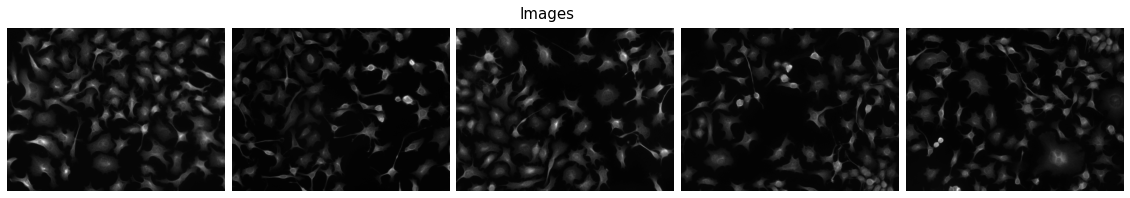

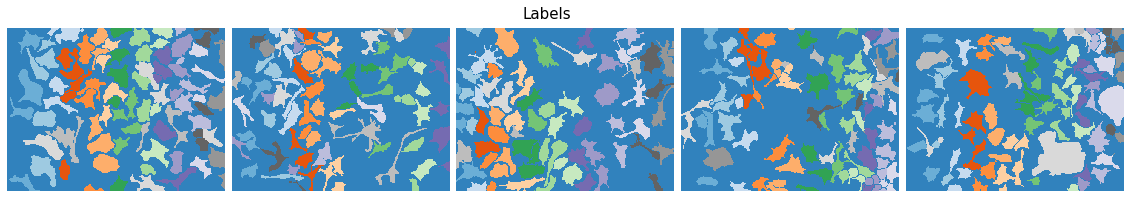

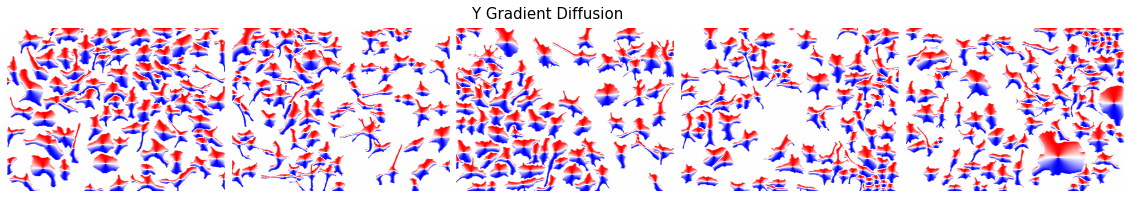

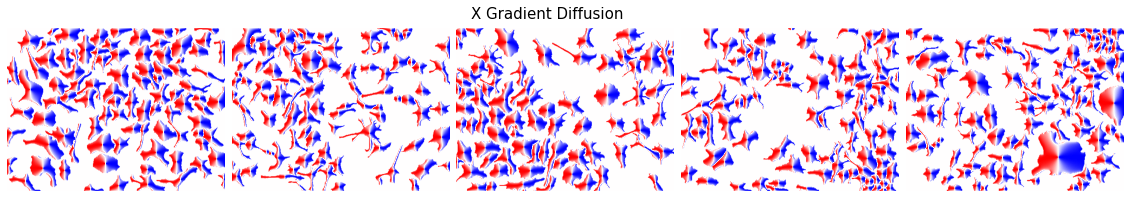

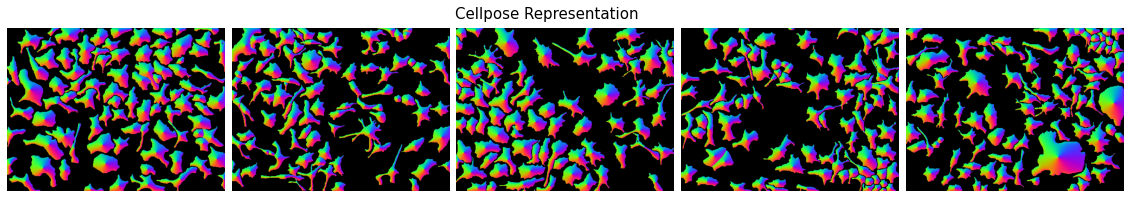

In [4]:
cellpose = [seg2diffgrads(x) for x in labels]
show(images, title = 'Images', cmap = "gray")
show(labels, title = 'Labels', cmap = "tab20c", interpolation="none")
show([x[0] for x in cellpose], title = 'Y Gradient Diffusion', cmap = "bwr")
show([x[1] for x in cellpose], title = 'X Gradient Diffusion', cmap = "bwr")

cellpose_vis = [dx_to_circ(x) for x in cellpose]
show(cellpose_vis, title = 'Cellpose Representation')

### 3D Inputs

In [5]:
# Load configs and dataset (3D dataset):
cfg_filename = '../configs/SNEMI/SNEMI-Base.yaml' # should be in the configs/ directory
cfg = get_cfg_defaults()
cfg.merge_from_file(cfg_filename)
cfg.DATASET.PAD_SIZE = [0,0,0]
cfg.DATASET.INPUT_PATH = "../datasets/SNEMI3D/"

images, labels, _ = _get_input(cfg, 'train')
images, labels = images[0], labels[0]
print(images.shape, labels.shape)

None 1 ['train_image.h5']
volume shape (original): (100, 1024, 1024)
volume shape (after scaling and padding): (100, 1024, 1024)
label shape (after scaling and padding): (100, 1024, 1024)
(100, 1024, 1024) (100, 1024, 1024)


In [6]:
# crop a subvolume for visualization
image_vol = images[50:58, 400:657, 400:657]
label_vol = labels[50:58, 400:657, 400:657]
label_vol = seg_widen_border(label_vol)

cellpose = seg2diffgrads(label_vol)
for i in range(2):
    print("value range: (%.3f, %.3f)" % (cellpose[i].min(), cellpose[i].max()))

value range: (-1.000, 1.000)
value range: (-1.000, 1.000)


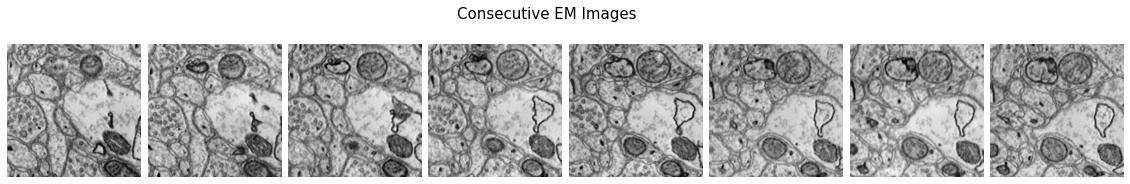

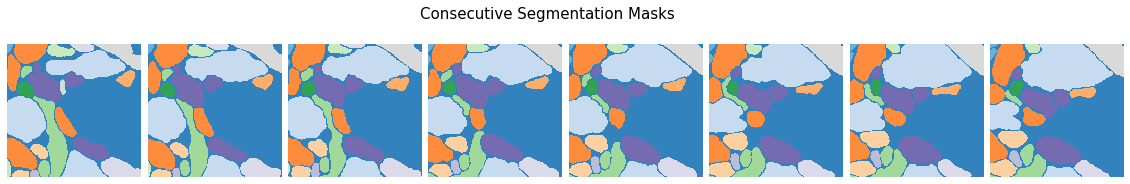

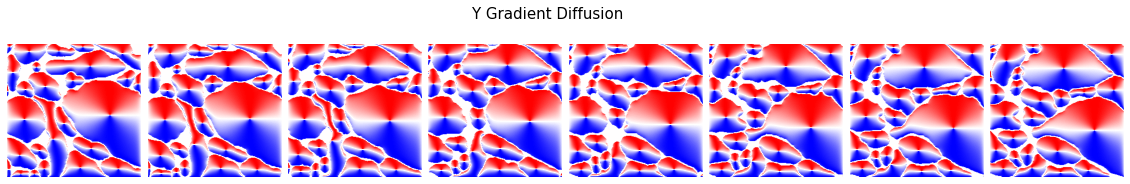

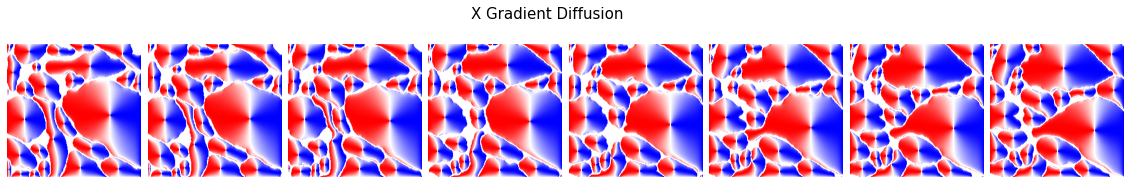

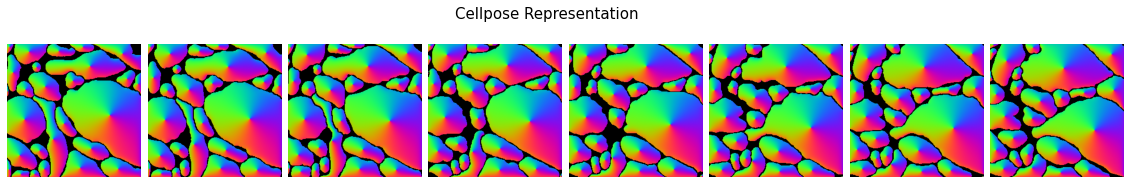

In [7]:
show(image_vol, title = 'Consecutive EM Images', cmap = "gray")
show(label_vol, title = 'Consecutive Segmentation Masks', cmap = "tab20c", interpolation="none")
show(cellpose[0], title = 'Y Gradient Diffusion', cmap = "bwr")
show(cellpose[1], title = 'X Gradient Diffusion', cmap = "bwr")

cellpose_vis = np.transpose(cellpose.copy(),(1,0,2,3))
cellpose_vis = np.transpose(dx_to_circ(cellpose_vis[:,:2]),(1,0,2,3))
show(cellpose_vis, title = 'Cellpose Representation')